<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Inisiasi" data-toc-modified-id="Inisiasi-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inisiasi</a></span><ul class="toc-item"><li><span><a href="#Library-dan-Data" data-toc-modified-id="Library-dan-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Library dan Data</a></span></li><li><span><a href="#Membandingkan-Perolehan-dan-Fitur-dengan-MAE" data-toc-modified-id="Membandingkan-Perolehan-dan-Fitur-dengan-MAE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Membandingkan Perolehan dan Fitur dengan MAE</a></span></li><li><span><a href="#Perbedaan-Fitur-Pada-Data-Train-dan-Test" data-toc-modified-id="Perbedaan-Fitur-Pada-Data-Train-dan-Test-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Perbedaan Fitur Pada Data Train dan Test</a></span></li><li><span><a href="#Pra-pemrosesan-Data" data-toc-modified-id="Pra-pemrosesan-Data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Pra-pemrosesan Data</a></span></li></ul></li><li><span><a href="#Analisis-Data" data-toc-modified-id="Analisis-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analisis Data</a></span><ul class="toc-item"><li><span><a href="#Perubahan-Konsentrasi-Pada-Logam" data-toc-modified-id="Perubahan-Konsentrasi-Pada-Logam-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Perubahan Konsentrasi Pada Logam</a></span></li><li><span><a href="#Analisis-Variasi-Data-Train-dan-Test" data-toc-modified-id="Analisis-Variasi-Data-Train-dan-Test-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Analisis Variasi Data Train dan Test</a></span></li><li><span><a href="#Analisis-Perubahan-Logam-Pada-Setiap-Fase" data-toc-modified-id="Analisis-Perubahan-Logam-Pada-Setiap-Fase-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Analisis Perubahan Logam Pada Setiap Fase</a></span></li></ul></li><li><span><a href="#Pelatihan-Model" data-toc-modified-id="Pelatihan-Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pelatihan Model</a></span><ul class="toc-item"><li><span><a href="#Langkah-Awal-Sebelum-Proses-Pelatihan" data-toc-modified-id="Langkah-Awal-Sebelum-Proses-Pelatihan-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Langkah Awal Sebelum Proses Pelatihan</a></span></li><li><span><a href="#Pencarian-Model-Dengan-SMAPE-Terendah" data-toc-modified-id="Pencarian-Model-Dengan-SMAPE-Terendah-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Pencarian Model Dengan SMAPE Terendah</a></span></li><li><span><a href="#Pengujian-Model-dengan-Data-Test" data-toc-modified-id="Pengujian-Model-dengan-Data-Test-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Pengujian Model dengan Data Test</a></span></li></ul></li></ul></div>

## Introduction

Pada proyek ini, kita diminta oleh sebuah perusahaan pertambangan untuk membuat model yang dapat memprediksi berapa perolehan konsentrat yang lebih kasar dan perolehan konsentrat akhir dari bahan-bahan yang sudah disiapkan dalam bentuk dataset. Untuk mendapatkan perolehan konsentrat akhir, ada beberapa proses yang dilakukan, mulai dari flotasi, pemurnian tahap 1, pemurnian tahap 2, dan barulah mendapatkan konsentrat akhir. 

Di penelitian kali ini, ada 3 dataset yang kita dapatkan. Pertama dataset yang lengkap dengan semua data, kedua adalah dataset untuk keperluan training model dimana semua fitur dan target sudah ada didalamnya, ketiga adalah dataset yang akan digunakan untuk keperluan testing, yang mana tidak ada data target, dan beberapa informasi kolom juga tidak tersedia. Untuk mengatasi masalah pada dataset testing, kita akan menggunakan dataset yang lengkap untuk mendapatkan data target guna menghitung sMAPE(Symmetric Mean Absolute Percentage Error).

Proses yang akan dijalankan pada kali ini diantaranya:
1. Inisiasi Library dan Data
2. Pra-pemrosesan data
3. Analisis data
4. Pemilihan algoritma untuk model prediksi
5. Pengujian model pada data test

## Inisiasi

### Library dan Data

Seperti pada umumnya, langkah awal yang harus kita lakukan adalah memasukan library yang kita perlukan pada penelitian kali ini. Dan karena target yang akan kita capai hitung berupa metrik regresi, maka kita perlu memasukan beberapa library yang berisi algoritma untuk metrik regresi dan pengujiannya. Berikutnya, kita akan meng-import semua dataset yang kita dapatkan dan mempelajari informasi apa saja yang ada pada dataset tersebut.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
df_full = pd.read_csv('datasets/gold_recovery_full.csv')
df_train = pd.read_csv('datasets/gold_recovery_train.csv')
df_test = pd.read_csv('datasets/gold_recovery_test.csv')

In [3]:
df_full.info(10)
df_full.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [4]:
df_train.info()
df_train.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [5]:
df_test.info()
df_test.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


### Membandingkan Perolehan dan Fitur dengan MAE

Sebelum pra-pemrosesan data, kita diminta untuk menghitung MAE antara kolom target (rougher.output.recovery) dengan nilai perolehan yang kita hitung dengan rumus berikut: 
Perolehan: (C * (F - T))/(F * (C-T))

- C — persentase emas dalam konsentrat tepat setelah proses flotasi
- F — persentase emas dalam feed sebelum proses flotasi 
- T — persentase emas dalam ekor yang lebih kasar, tepat setelah proses flotasi

In [6]:
#rougher.output.recovery = perolehan konsentrat yang lebih kasar
#final.output.recovery = perolehan konsentrat akhir

#Formula: (c * (f - t))/(f * (c-t))

#rougher.output.recovery:
#(rougher.output.concentrate_au * (rougher.input.feed_au - final.output.tail_au))/(rougher.input.feed_au * (rougher.output.concentrate_au - final.output.tail_au))

#final.output.recovery:
#(primary_cleaner.output.concentrate_au * (rougher.output.concentrate_au - final.output.concentrate_au))/(rougher.output.concentrate_au * (primary_cleaner.output.concentrate_au - final.output.concentrate_au))

In [7]:
df_train['rougher.output.concentrate_au'].describe()

count    16778.000000
mean        17.401541
std          6.921875
min          0.000000
25%         17.443663
50%         19.644663
75%         21.224486
max         28.522811
Name: rougher.output.concentrate_au, dtype: float64

In [8]:
df_train['rougher.input.feed_au'].describe()

count    16777.000000
mean         7.170717
std          3.002113
min          0.000000
25%          6.203083
50%          7.443530
75%          8.965193
max         14.093363
Name: rougher.input.feed_au, dtype: float64

In [9]:
df_train['rougher.output.tail_au'].describe()

count    14611.000000
mean         1.763930
std          0.731518
min          0.020676
25%          1.311610
50%          1.747907
75%          2.190839
max          9.688980
Name: rougher.output.tail_au, dtype: float64

In [10]:
temp_df_train = df_train[(df_train['rougher.output.concentrate_au'].isna() == False) & (df_train['rougher.input.feed_au'].isna() == False) & 
                        (df_train['rougher.output.tail_au'].isna() == False) & (df_train['rougher.output.recovery'].isna() == False)]
c = temp_df_train['rougher.output.concentrate_au']
f = temp_df_train['rougher.input.feed_au']
t = temp_df_train['rougher.output.tail_au']

perolehan = abs((c * (f - t))/(f * (c-t)) * 100)
perolehan = perolehan.replace([np.inf, -np.inf, np.nan], 0)

#df_train['rougher.output.recovery'] = df_train['rougher.output.recovery'].fillna(0)

In [11]:
perolehan[(perolehan == np.inf) | (perolehan == -np.inf) | (perolehan == -np.nan)]

Series([], dtype: float64)

In [12]:
perolehan.sample(10)

2851     75.526403
11318    85.391023
14548    90.284478
13948    98.724441
10744    87.342782
10555    85.165457
6501     86.870708
7800     85.876533
15237    88.615105
15975    96.284811
dtype: float64

In [13]:
perolehan.describe()

count    14287.000000
mean        82.394201
std         15.096808
min          0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
dtype: float64

In [14]:
temp_df_train['rougher.output.recovery'].describe()

count    14287.000000
mean        82.394201
std         15.096808
min          0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [15]:
mean_absolute_error(temp_df_train['rougher.output.recovery'], perolehan)

9.303415616264301e-15

Dari hasil MAE yang kita dapatkan setelah penghapusan nilai hilang pada data train, maka antara nilai perolehan yang kita hitung dengan nilai pada rougher.output.recovery adakah 9.e-15. Yang menunjukan rata-rata perbedaannya pada setiap hasilnya. Hasil ini menunjukan perbedaannya sangat kecil antara hasil yang kita hitung dengan data yang kita dapatkan. 

### Perbedaan Fitur Pada Data Train dan Test

In [16]:
#Cek fitur yang tidak ada di data test
available_features = []
for c in df_train.columns:
    if c not in df_test.columns:
        available_features.append(c)
        
available_features

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

In [17]:
len(available_features)

34

Pada tahap pertama, kita telah menemukan keanehan dimana jumlah kolom pada data train lebih banyak dibanding data test, dengan ada 34 kolom yang tidak ada pada data test. Kolom-kolom yang ada pada data test ini akan kita hapus pada tahap berikutnya agar proses pelatihan model lebih akurat.

### Pra-pemrosesan Data

Sebelum proses analisa dan pelatihan model, pra-pemrosesan data merupakan langkah terpenting yang harus dilakukan. Pada tahap ini, kita perlu memastikan bahwa data yang kita miliki cukup untuk dianalisa agar bisa mendapatkan kesimpulan, dan juga cukup untuk dilakukan pelatihan model dan pengujian model. Pada pra-pemrosesan data kali ini, pertama kita akan mengecek data null pada semua dataset, dan mengubahnya menjadi nilai 0. 

In [18]:
#pra pemrosesan data
print('Before fill N/A values:')
df_train.isna().sum()

Before fill N/A values:


date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [19]:
df_train = df_train.fillna(0)
print('After fill N/A values:')
df_train.isna().sum()

After fill N/A values:


date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64

In [20]:
print('Before fill N/A values:')
df_test.isna().sum()

Before fill N/A values:


date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [21]:
df_test = df_test.fillna(0)
print('After fill N/A values:')
df_test.isna().sum()

After fill N/A values:


date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Setelah memperbaiki nilai yang hilang, berikutnya adalah menyamakan kolom pada data train dengan data test. Dengan cara kita mengambil semua kolom di data train dimana kolom tersebut juga ada pada data train. Setelah itu, kita perlu melakukan join pada data test dengan data lengkap untuk bisa mendapatkan kolom target (rougher.output.recovery, final.output.recovery). 

In [22]:
#remove unused features
data_test_model = df_test.merge(df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')
data_test_model = data_test_model.fillna(0)

data_train_model = df_train[data_test_model.columns]
data_train_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        16860 non-null  object 
 1   primary_cleaner.input.sulfate               16860 non-null  float64
 2   primary_cleaner.input.depressant            16860 non-null  float64
 3   primary_cleaner.input.feed_size             16860 non-null  float64
 4   primary_cleaner.input.xanthate              16860 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      16860 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    16860 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      16860 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    16860 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      16860 non-null  float64
 10  primary_cl

In [23]:
data_test_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5856 non-null   float64
 2   primary_cleaner.input.depressant            5856 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5856 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5856 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5856 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5856 non-null   float64
 10  primary_clea

In [24]:
data_train_model_feature = data_train_model.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
data_train_model_target = data_train_model[['rougher.output.recovery', 'final.output.recovery']]

data_test_model_feature = data_test_model.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
data_test_model_target = data_test_model[['rougher.output.recovery', 'final.output.recovery']]

## Analisis Data

Kita sudah memiliki data yang cukup untuk melakukan analisa, sekarang ada beberapa point yang diminta oleh perusahaan untuk kita analisa, yaitu: 
- Perubahan konsentrasi pada logam (au, ag dan pb)
- Variasi data train dan test
- Perubahan konsentrasi logam pada tiap fase

### Perubahan Konsentrasi Pada Logam

In [25]:
#2.1
logam = [
    {
        "item": "au",
        "feature": ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'],    
    },
    {
        "item": "ag",
        "feature": ['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'],   
    },
    {
        "item": "pb",
        "feature": ['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']
    }
]

rougher.input.feed_au                     7.135416
rougher.output.concentrate_au            17.316907
primary_cleaner.output.concentrate_au    29.022751
final.output.concentrate_au              39.301015
dtype: float64


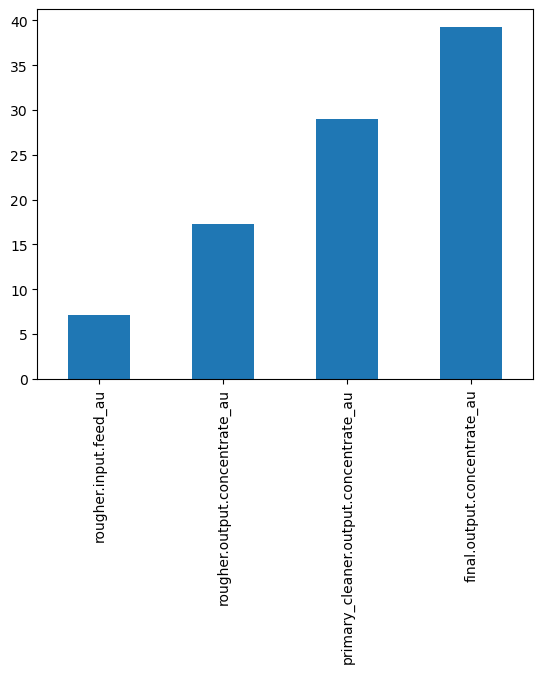

rougher.input.feed_ag                     7.794254
rougher.output.concentrate_ag            10.529016
primary_cleaner.output.concentrate_ag     7.386539
final.output.concentrate_ag               4.696764
dtype: float64


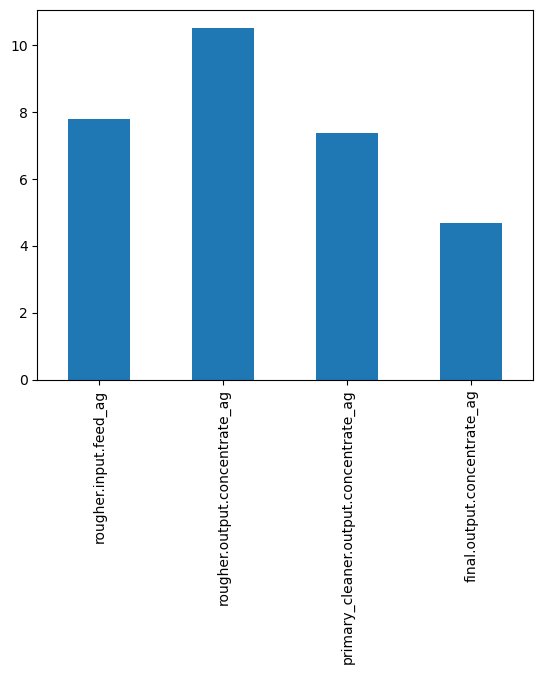

rougher.input.feed_pb                    3.175401
rougher.output.concentrate_pb            6.846859
primary_cleaner.output.concentrate_pb    8.437253
final.output.concentrate_pb              9.074640
dtype: float64


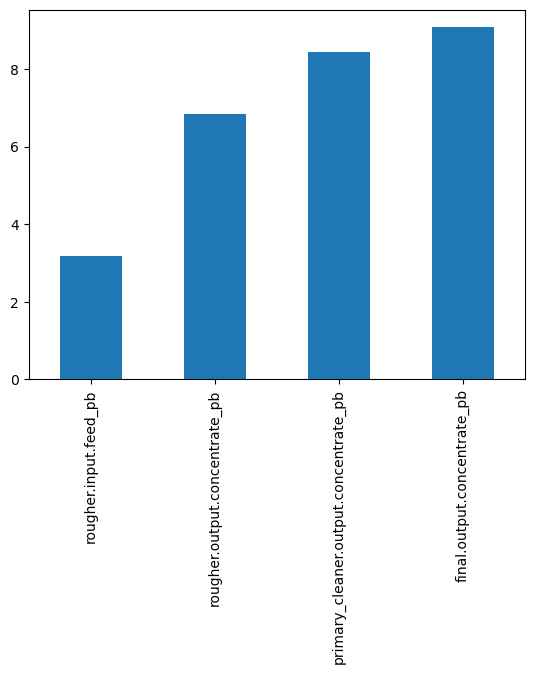

In [26]:
for l in logam:
    concentrate = df_train[l['feature']].mean()
    print(concentrate)
    concentrate.plot(kind='bar')
    plt.show()

Dari hasil diatas, komponen logam au dan pb memiliki pola yang sama, dimana setiap fase yang dilalui, kandungannya semakin bertambah. Semakin akhir fase dilakukan, konsentrasi yang dimiliki adalah paling tinggi. Sedangkan pada logam ag sedikit berbeda, yang mana justru kandungan tertinggi ada pada fase kedua atau pada proses konsentrat yang lebih kasar. Dan semakin menurun sampai pada konsentrat akhir.

### Analisis Variasi Data Train dan Test

In [27]:
print(f'Alpha: 0.05')
for c in df_test.columns:
    if c != 'date':
        levene_test = st.levene(df_test[c], df_train[c])        
        equal_var = True if levene_test.pvalue > 0.05 else False
        print(f'Feature: {c}, Equal Var: {equal_var}, Levene Value: {levene_test.pvalue}')
        

Alpha: 0.05
Feature: primary_cleaner.input.sulfate, Equal Var: False, Levene Value: 5.95837781762918e-06
Feature: primary_cleaner.input.depressant, Equal Var: False, Levene Value: 1.4143677053455786e-42
Feature: primary_cleaner.input.feed_size, Equal Var: True, Levene Value: 0.9052770087883676
Feature: primary_cleaner.input.xanthate, Equal Var: False, Levene Value: 1.2153985303119892e-253
Feature: primary_cleaner.state.floatbank8_a_air, Equal Var: False, Levene Value: 9.676818234986325e-09
Feature: primary_cleaner.state.floatbank8_a_level, Equal Var: False, Levene Value: 1.2696219056203693e-29
Feature: primary_cleaner.state.floatbank8_b_air, Equal Var: False, Levene Value: 2.9861604172260216e-08
Feature: primary_cleaner.state.floatbank8_b_level, Equal Var: False, Levene Value: 1.141169169156153e-11
Feature: primary_cleaner.state.floatbank8_c_air, Equal Var: False, Levene Value: 1.3247422628779534e-11
Feature: primary_cleaner.state.floatbank8_c_level, Equal Var: False, Levene Value: 3.1

### Analisis Perubahan Logam Pada Setiap Fase

Logam:  AU
-----------------
rougher.input.feed_au:


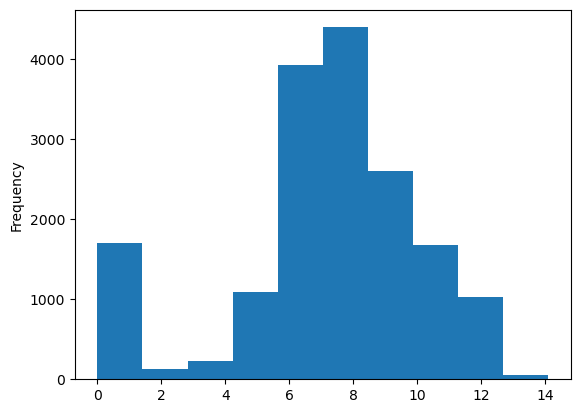

rougher.output.concentrate_au:


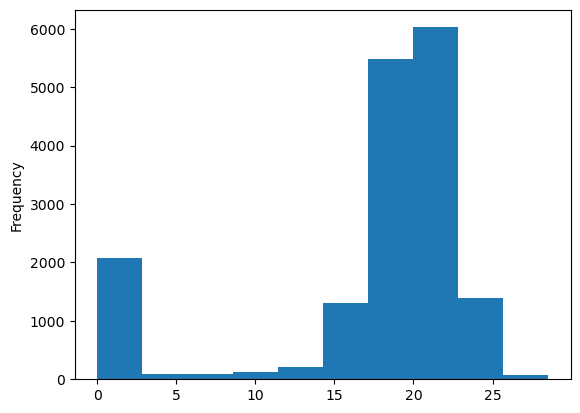

primary_cleaner.output.concentrate_au:


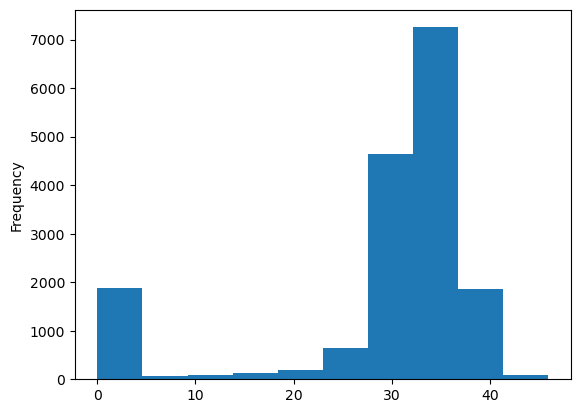

final.output.concentrate_au:


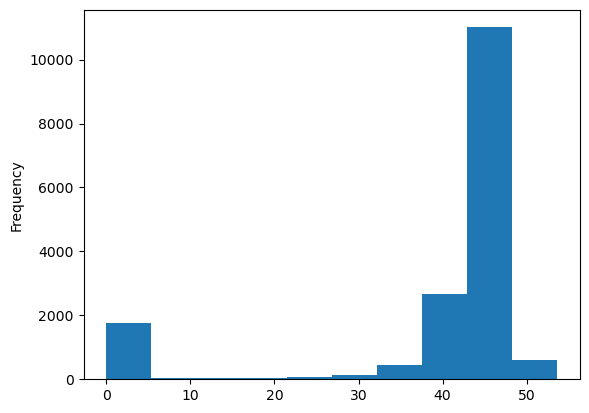

Logam:  AG
-----------------
rougher.input.feed_ag:


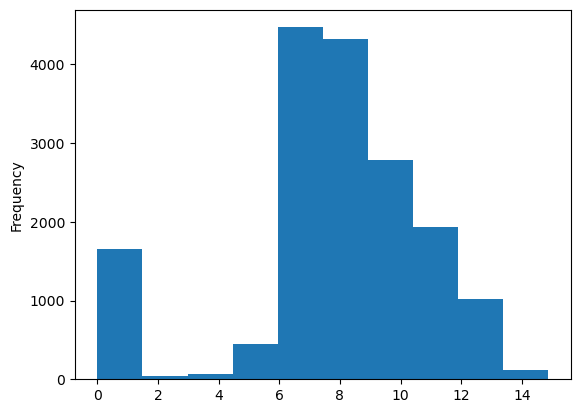

rougher.output.concentrate_ag:


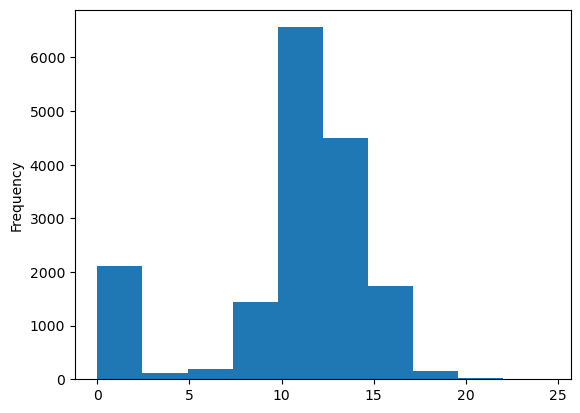

primary_cleaner.output.concentrate_ag:


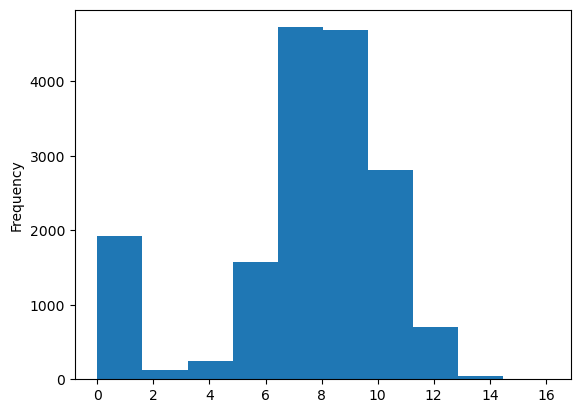

final.output.concentrate_ag:


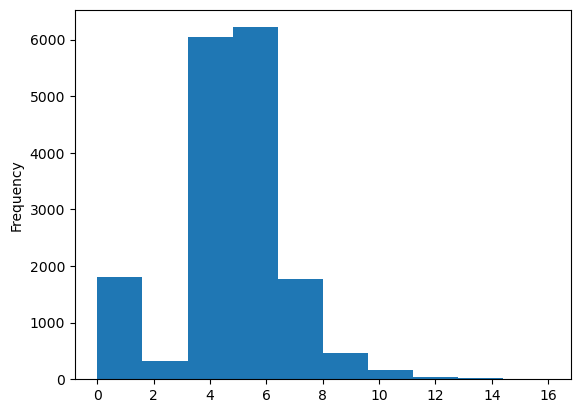

Logam:  PB
-----------------
rougher.input.feed_pb:


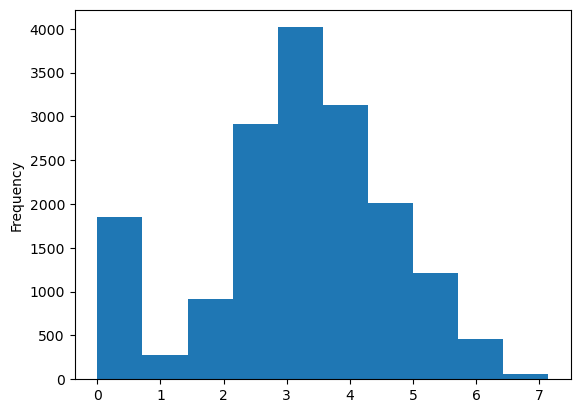

rougher.output.concentrate_pb:


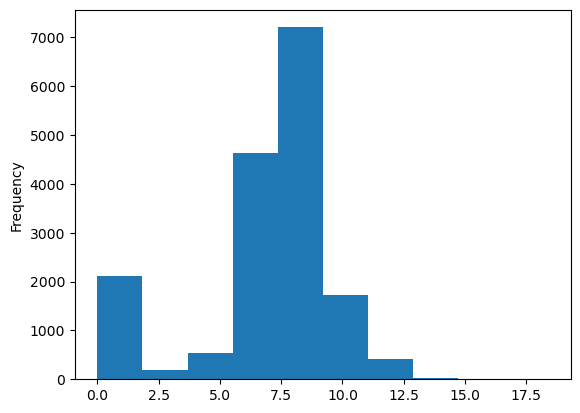

primary_cleaner.output.concentrate_pb:


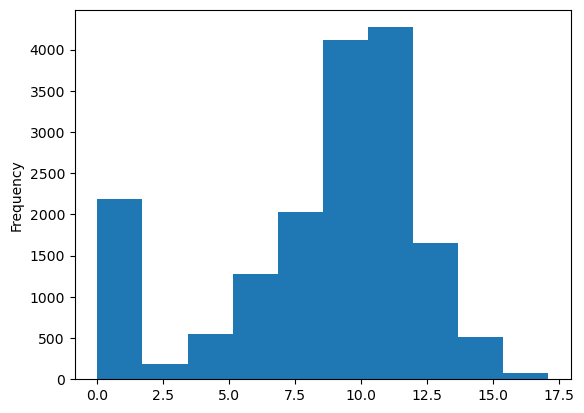

final.output.concentrate_pb:


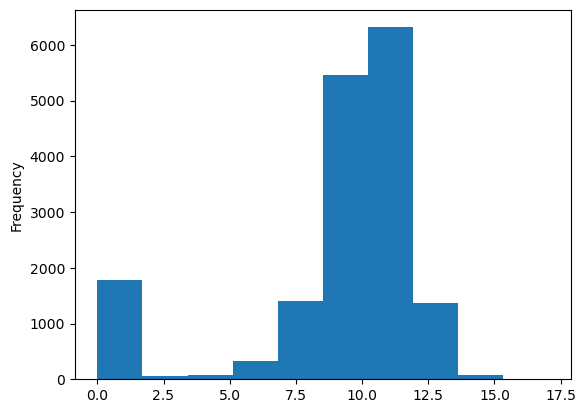

In [28]:
for l in logam:
    print('Logam: ', l['item'].upper())
    print(f'-----------------')
    for f in l['feature']:
        print(f'{f}:')
        df_train[f].plot(kind='hist')
        plt.show()

Sama seperti hasil analisa perubahan konsentrasi pada logam. Pada logam au dan pb selalu bertambah disetiap fase-nya. Pada logam au, konsentrat akhir paling banyak diangka 40 dengan jumlah data melebihi 10000. Sedangkan untuk logam jenis ag, nilai tertinggi adalah 10 dan pada fase konsentrat yang lebih kasar dengan jumlah data diatas 6000.

## Pelatihan Model

### Langkah Awal Sebelum Proses Pelatihan

Sebelum proses penelitian, kita akan membuat beberapa fungsi untuk mempermudah proses perhitungan dan pengujian model yang akan kita latih. Fungsi tersebut untuk menghitung smape, smape akhir dan validasi model dengan cross validation.

In [29]:
def smape(pred, target):
    return abs(((target-pred)/((target+pred)/2)).mean())

def final_smape(rougher, final):
    return (0.25 * rougher) + (0.75 * final)

In [30]:
#Uji dengan cross validation sebanyak 5 iterations
def cross_validation(feature, target, size, model):
    smape_score = []
    for i in range(0, len(feature), size):        
        valid_indexes = list(range(i, i+size))
        f_valid = feature.iloc[valid_indexes]
        t_valid = target.iloc[valid_indexes]
        
        predictions_valid = model.predict(f_valid)
        df_predictions_valid = pd.DataFrame(predictions_valid, columns=['rougher', 'final'])        
        smape_rougher_output = smape(df_predictions_valid['rougher'], t_valid['rougher.output.recovery'])
        smape_final_output = smape(df_predictions_valid['final'], t_valid['final.output.recovery'])
        smape_final = final_smape(smape_rougher_output, smape_final_output)
        smape_score.append(smape_final)
        
    return smape_score

In [31]:
#Latih model
#Pembagian 75:25, train & valid
features_train, features_valid, target_train, target_valid = train_test_split(data_train_model_feature, data_train_model_target, test_size=0.25, random_state=12345)

sample_size = int(len(features_valid)/5)

### Pencarian Model Dengan SMAPE Terendah

Karena data yang kita cari berupa metrik regresi, maka kita perlu membuat model dengan 3 algoritma, diantaranya: 
- Linear Regression
- Decision Tree (kedalaman 1-10)
- Random Forest (est kelipatan 10 dari 10-20, dan kedalaman 1-10)


In [32]:
#Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(features_train, target_train)
linear_regression_smape_score = cross_validation(features_valid, target_valid, sample_size, linear_regression)
    
print(f'SMAPE Final: {sum(linear_regression_smape_score)/len(linear_regression_smape_score):.2%}')


SMAPE Final: 8.88%


In [33]:
#Decision Tree

decision_tree = None
decision_tree_smape_score = 100

for depth in range(1,10):
    model = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)

    cross_val_res = cross_validation(features_valid, target_valid, sample_size, model)
    cross_val_res_score = sum(cross_val_res)/len(cross_val_res)
    
    #decision_tree_smape_score = decision_tree_smape_score if decision_tree_smape_score < cross_val_res_score else cross_val_res_score;
    if decision_tree_smape_score > cross_val_res_score:
        decision_tree = model
        decision_tree_smape_score = cross_val_res_score        
        print(f'Depth: {depth}, SMAPE Final: {decision_tree_smape_score:.2%}')
    
    

Depth: 1, SMAPE Final: 10.32%
Depth: 2, SMAPE Final: 7.12%
Depth: 4, SMAPE Final: 6.70%
Depth: 5, SMAPE Final: 4.41%


In [34]:
#Random Forest

random_forest = None
random_forest_smape_score = 100

for est in range(10,21,10):
    for depth in range(1,10):
        model = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        
        cross_val_res = cross_validation(features_valid, target_valid, sample_size, model)
        cross_val_res_score = sum(cross_val_res)/len(cross_val_res)
        
        if random_forest_smape_score > cross_val_res_score:
            random_forest = model
            random_forest_smape_score = cross_val_res_score        
            print(f'Est: {est}, Depth: {depth}, SMAPE Final: {random_forest_smape_score:.2%}')

Est: 10, Depth: 1, SMAPE Final: 10.35%
Est: 10, Depth: 2, SMAPE Final: 7.09%
Est: 10, Depth: 4, SMAPE Final: 6.93%
Est: 10, Depth: 5, SMAPE Final: 6.56%
Est: 10, Depth: 7, SMAPE Final: 5.20%
Est: 10, Depth: 8, SMAPE Final: 4.88%
Est: 20, Depth: 9, SMAPE Final: 4.83%


Dari pelatihan 3 algoritma model, didapatkan model dengan algoritma Decision Tree dengan kedalaman 5 adalah model yang dapat memberikan nilai sMAPE terendah pada data validasi dengan nilai 4.41% dengan catatan nilai sMAPE ini didapatkan dengan membandingkan data prediksi dengan target yang sebenarnya. Model ini akan kita gunakan untuk melakukan pengujian pada data test. 

### Pengujian Model dengan Data Test

In [35]:
predictions_test = decision_tree.predict(data_test_model_feature)
df_predictions_test = pd.DataFrame(predictions_test, columns=['rougher', 'final'])
smape_rougher_output_test = smape(df_predictions_test['rougher'], data_test_model_target['rougher.output.recovery'])
smape_final_output_test = smape(df_predictions_test['final'], data_test_model_target['final.output.recovery'])
smape_final_test = final_smape(smape_rougher_output_test, smape_final_output_test)
print(f'{smape_final_test:.2%}')

0.51%


Dengan menggunakan model Decision Tree, kita mendapatkan nilai sMAPE 0.51% pada data test. Nilai ini jauh lebih kecil dari yang kita dapatkan pada data validasi sebelumnya sebesar 4.41%. 